<a href="https://colab.research.google.com/github/nnovajulian08/Julian/blob/main/Data_Science_Job_Skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Job Skills

##Project Description
The purpose of this project is to perform an analysis on what are the most common skills that employers are looking for in a Data Scientist.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
job_postings = pd.read_csv('job_postings.csv')

In [9]:
job_postings.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


Identifying missing values in each column:

job_link               0
last_processed_time    0
last_status            0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           1
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64


/tmp/ipython-input-10-778029371.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette='viridis')


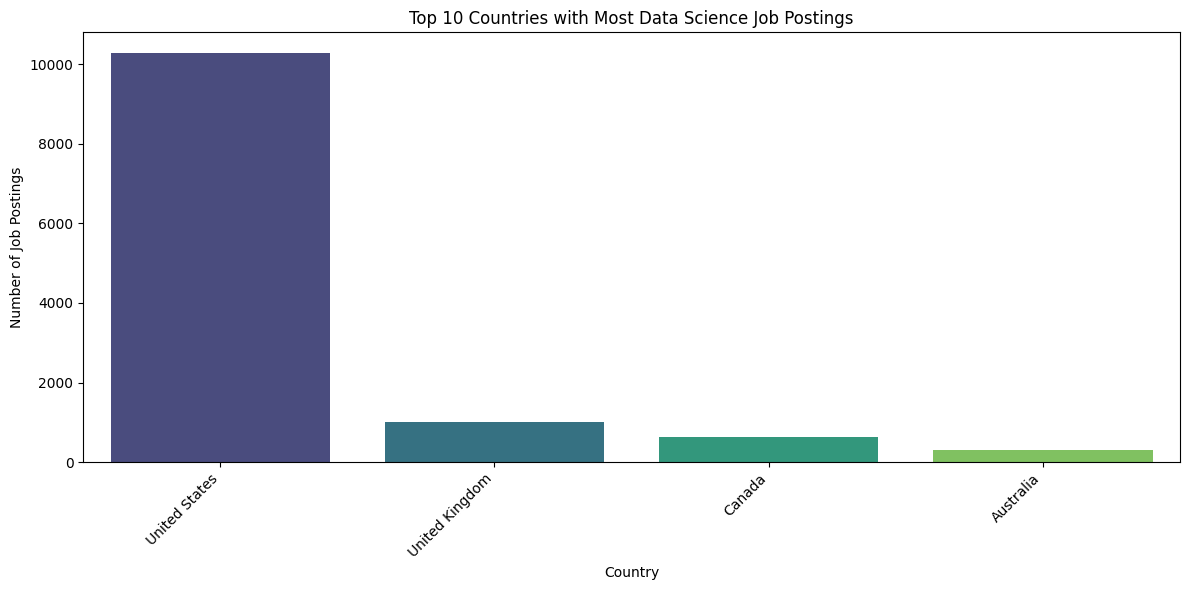

In [10]:
# prompt: Create a plot that indicates what countries have the most data science job postings

# Check for null values
print(job_postings.isnull().sum())
# Dropping all records where `country` is null.
job_postings.dropna(subset=['search_country'], inplace=True)
# Number of data science job postings per country
country_counts = job_postings['search_country'].value_counts()
# Plotting the top 10 countries with the most job postings
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, palette='viridis')
plt.title('Top 10 Countries with Most Data Science Job Postings')
plt.xlabel('Country')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-2417055048.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts_us.head(10).index, y=city_counts_us.head(10).values, palette='viridis')


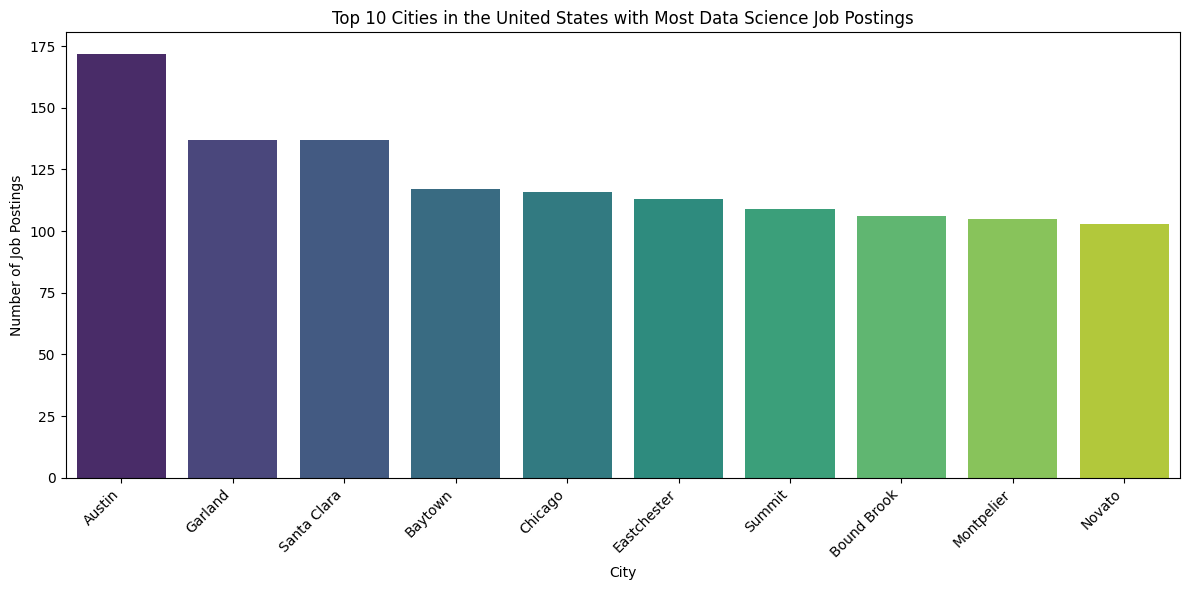

In [13]:
# prompt: Now within the United States do the same thing with cities

# Filter for job postings within the United States
us_job_postings = job_postings[job_postings['search_country'] == 'United States']

# Count job postings per city within the United States
city_counts_us = us_job_postings['search_city'].value_counts()

# Plotting the top 10 cities in the US with the most job postings
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts_us.head(10).index, y=city_counts_us.head(10).values, palette='viridis')
plt.title('Top 10 Cities in the United States with Most Data Science Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

job_level    Associate  Mid senior
search_city                       
Aberdeen             2          29
Abingdon             0           1
Abington             0           6
Ada                  0           3
Adrian               0           1
...                ...         ...
Wyoming              1           5
Xenia                2          13
Yellowknife          0           1
York                 4          31
Zion                 0           5

[801 rows x 2 columns]


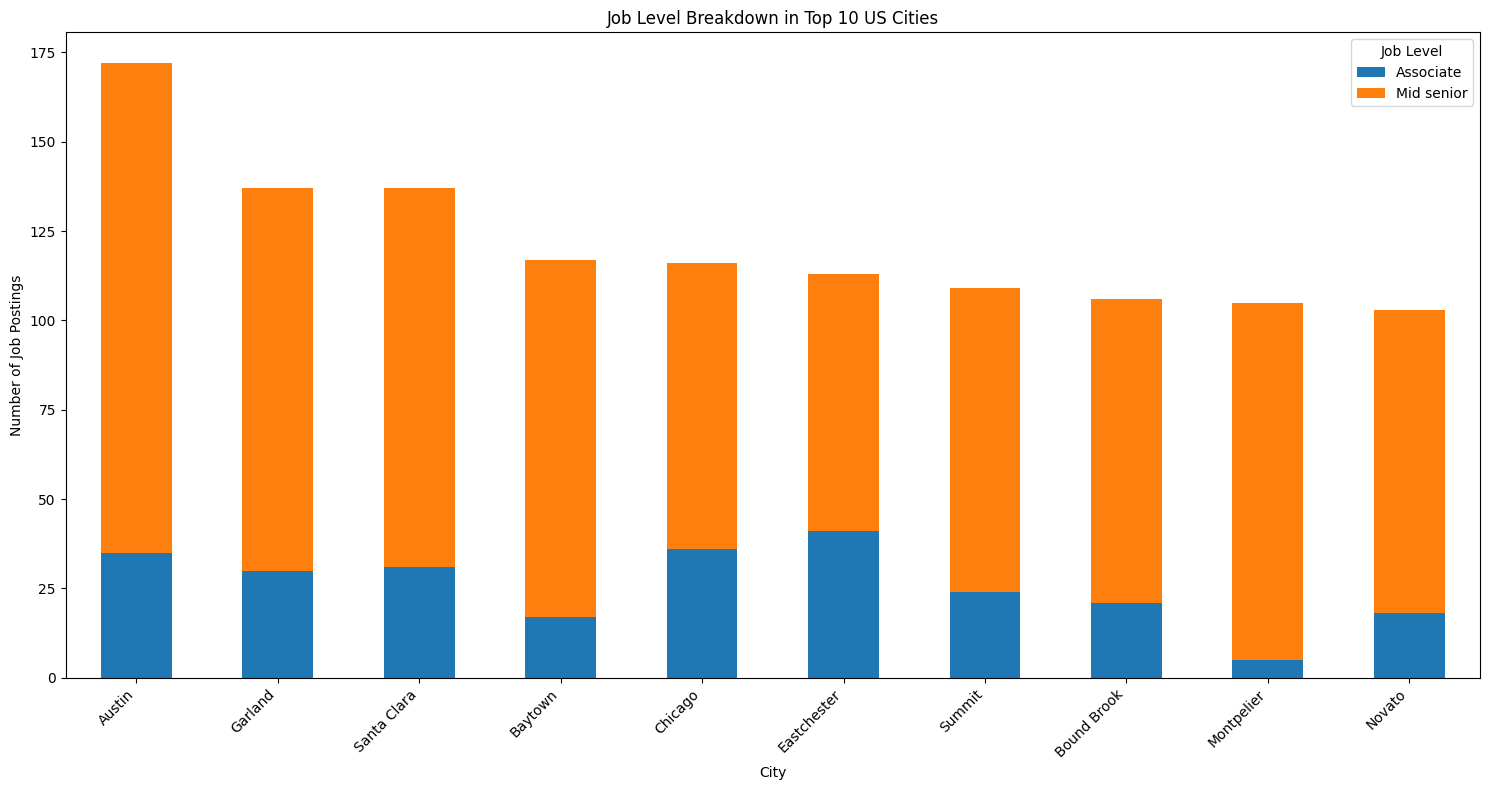

In [17]:
# prompt: Now identify for each city the breakdown of job_level

# Assuming 'job_level' is a column in the DataFrame
# If 'job_level' doesn't exist, this code will throw an error.
# You would need to inspect your CSV file to see the exact column names.

# Group by city and then by job level, and count occurrences
city_job_level_breakdown = job_postings.groupby(['search_city', 'job_level']).size().unstack(fill_value=0)

# Print the breakdown
print(city_job_level_breakdown)

# To visualize the breakdown for a few top cities, you could select a subset:
# Get the top N cities based on total job postings
top_cities = city_counts_us.head(10).index.tolist()

# Filter the breakdown for these top cities
top_cities_breakdown = city_job_level_breakdown.loc[top_cities]

# Plot the breakdown for the top cities (example using stacked bar plot)
top_cities_breakdown.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Job Level Breakdown in Top 10 US Cities')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Level')
plt.tight_layout()
plt.show()

In [18]:
job_skills = pd.read_csv('job_skills.csv')
job_skills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


/tmp/ipython-input-21-2160135811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.head(n_top_skills).index, y=skill_counts.head(n_top_skills).values, palette='viridis')


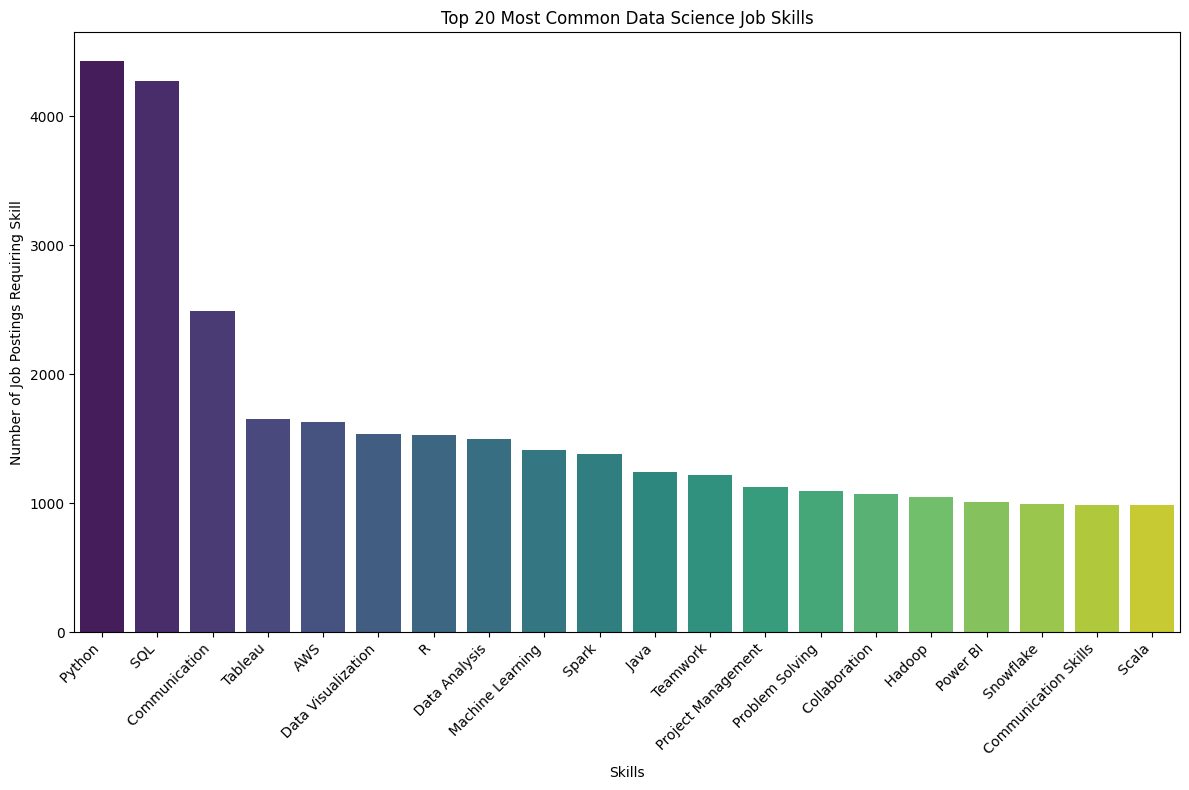

In [21]:
# prompt: graph most common job_skills. only use the job_skills data no merging

# Flatten the list of skills and count occurrences
all_skills = job_skills['job_skills'].str.split(',', expand=True).stack()
skill_counts = all_skills.value_counts()

# Plotting the top N most common skills (adjust N as needed)
n_top_skills = 20  # You can change this number
plt.figure(figsize=(12, 8))
sns.barplot(x=skill_counts.head(n_top_skills).index, y=skill_counts.head(n_top_skills).values, palette='viridis')
plt.title(f'Top {n_top_skills} Most Common Data Science Job Skills')
plt.xlabel('Skills')
plt.ylabel('Number of Job Postings Requiring Skill')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
job_summary = pd.read_csv('job_summary.csv')
job_summary.head()

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...
